In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt

import cairocffi as cairo

In [79]:
#load bin file by utils.quickdrawbin.unpack_drawings
idx = 3
bins = glob.glob("/data/lihui02/quickdraw/*.bin",recursive=True)
print(bins[idx])

images = utils.quickdrawbin.unpack_drawings(bins[idx])

/data/lihui02/quickdraw/bowtie.bin


In [83]:
#it return a generator, get image from it
image = next(images)
image

{'key_id': 6433727804604416,
 'country_code': b'US',
 'recognized': 1,
 'timestamp': 1488822218,
 'image': [((131, 190, 167, 123, 114, 134), (36, 106, 109, 101, 46, 35)),
  ((118, 61, 31, 14, 3, 0, 2, 16, 34, 58, 130),
   (41, 14, 14, 31, 57, 78, 122, 141, 146, 139, 104)),
  ((138, 191), (42, 111)),
  ((133, 158, 191, 223, 234, 250, 255, 253, 243, 231, 190),
   (37, 18, 3, 0, 10, 40, 62, 79, 92, 99, 104))]}

In [84]:
#conver to image np
imgnp = utils.drawimage.vector_to_image(image['image'])

0 255 (256, 256)


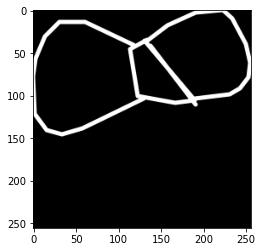

In [85]:
print(imgnp.min(),imgnp.max(),imgnp.shape)
plt.imshow(imgnp,cmap='gray')
plt.show()

In [91]:
#save imgnp to file, packbits and zip is a littler smaller then only zip, so will only zip it
imgnpb = np.where(imgnp == 0,False,True)
print(imgnp.min(),imgnp.max(),imgnp.shape)

# packed data
imgnpb2 = np.packbits(imgnpb, axis=None)

np.save('./out/imgnpb',imgnpb)
np.save('./out/imgnpb2',imgnpb2)
np.savez_compressed('./out/imgnpb',imgnpb)
np.savez_compressed('./out/imgnpb2',imgnpb2)

!ls -lh ./out/

0 255 (256, 256)
total 88K
-rw-rw-r-- 1 lihui lihui  65K Oct 30 09:21 imgnpb.npy
-rw-rw-r-- 1 lihui lihui 1.4K Oct 30 09:21 imgnpb.npz
-rw-rw-r-- 1 lihui lihui 8.2K Oct 30 09:21 imgnpb2.npy
-rw-rw-r-- 1 lihui lihui 1.2K Oct 30 09:21 imgnpb2.npz
